In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kuliah/UMM/Semester 7/Temu Kembali Citra"

In [5]:
%cd '/content/drive/MyDrive/Kuliah/UMM/Semester 7/Temu Kembali Citra'

/content/drive/MyDrive/Kuliah/UMM/Semester 7/Temu Kembali Citra


In [8]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 97% 320M/330M [00:02<00:00, 132MB/s]
100% 330M/330M [00:02<00:00, 129MB/s]


In [33]:
import zipfile
local_zip = 'face-mask-12k-images-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [45]:
train_dir = "Face Mask Dataset/Train"
val_dir = "Face Mask Dataset/Validation"
test_dir = "Face Mask Dataset/Test"

classes = ["With Mask", "Without Mask"]

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras import layers
from tensorflow.keras.applications.mobilenet import MobileNet
import matplotlib.gridspec as gridspec
from sklearn.metrics import classification_report, accuracy_score
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

import glob
import os
import random
import cv2

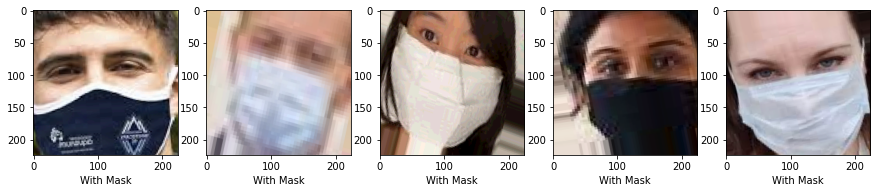

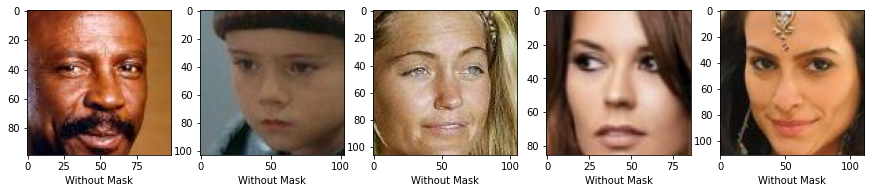

In [49]:
n = 5
## Check Image
plt.figure(figsize=(15, n))
for i in range(n):
    # read image
    sample = random.choice(os.listdir(train_dir + "/WithMask"))
    # print("filename:", sample)
    img_dir = train_dir + "/WithMask/" + sample
    img = cv2.imread(img_dir)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plot image
    plt.subplot(1, n, 1+i)
    plt.imshow(img)
    plt.xlabel("With Mask")
plt.show()   

plt.figure(figsize=(15, n))
for i in range(n):
    # read image
    sample = random.choice(os.listdir(train_dir + "/WithoutMask"))
    # print("filename:", sample)
    img_dir = train_dir + "/WithoutMask/" + sample
    img = cv2.imread(img_dir)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plot image
    plt.subplot(1, n, 1+i)
    plt.imshow(img)
    plt.xlabel("Without Mask")
plt.show()   

In [50]:
train_datagen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=0.2,
                                shear_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=False,
                                )

val_datagen = ImageDataGenerator(rescale=1./255)

In [51]:
# Image Generator Config
target_size = (150, 150)
batch_size = 16

# Load Dataset
train_dataset = train_datagen.flow_from_directory(train_dir,
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)

val_dataset = val_datagen.flow_from_directory(val_dir,
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              class_mode="categorical",
                                              shuffle=False)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [53]:
base_model = tf.keras.applications.MobileNet(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False
    
model = keras.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 2)                 32770     
                                                                 
Total params: 3,261,634
Trainable params: 32,770
Non-trainable params: 3,228,864
_________________________________________________________________


In [54]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics ="accuracy")

In [55]:
EPOCHS = 100
history = model.fit_generator(train_dataset,
                               steps_per_epoch=len(train_dataset)//train_dataset.batch_size,
                               validation_data=val_dataset, 
                               validation_steps=len(val_dataset)//val_dataset.batch_size,
                               epochs=EPOCHS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
39/39 [==============================] - 16s 363ms/step - loss: 0.2178 - accuracy: 0.9647 - val_loss: 0.3484 - val_accuracy: 0.9583
Epoch 2/100
39/39 [==============================] - 14s 348ms/step - loss: 0.1035 - accuracy: 0.9936 - val_loss: 0.1512 - val_accuracy: 0.9583
Epoch 3/100
39/39 [==============================] - 14s 352ms/step - loss: 0.0316 - accuracy: 0.9952 - val_loss: 0.6079 - val_accuracy: 0.9375
Epoch 4/100
39/39 [==============================] - 14s 351ms/step - loss: 0.1120 - accuracy: 0.9856 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
39/39 [==============================] - 14s 349ms/step - loss: 0.1251 - accuracy: 0.9904 - val_loss: 0.3525 - val_accuracy: 0.9792
Epoch 6/100
39/39 [==============================] - 14s 353ms/step - loss: 0.1453 - accuracy: 0.9872 - val_loss: 0.2935 - val_accuracy: 0.9792
Epoch 7/100
39/39 [==============================] - 14s 351ms/step - loss: 0.0868 - accuracy: 0.9888 - val_loss: 3.8743e-07 - val_a

In [56]:
import json

history_json = history.history
json.dump(history_json, open('model_retrieavl.json', 'w'))

In [57]:
model.save('model_retrieavl.h5')
model.save_weights('model_weight_retrieavl.h5')

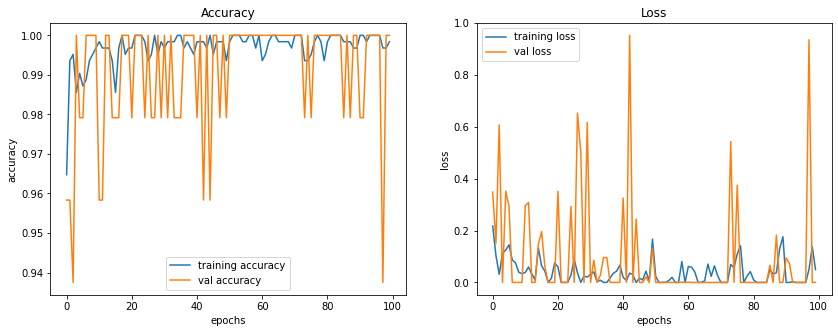

In [58]:
## Review Our Model
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(14,5))
grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[0])
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

fig.add_subplot(grid[1])
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [59]:
# Load Test Dataset
test_dataset = val_datagen.flow_from_directory(test_dir,
                                            target_size=target_size,
                                            batch_size=1,
                                            class_mode=None,
                                            shuffle=False)

Found 992 images belonging to 2 classes.


In [60]:
probabilities = model.predict_generator(test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [61]:
y_pred = probabilities.argmax(axis=-1)
y_test = test_dataset.classes

In [62]:
print("Accuracy Score of Model:", accuracy_score(y_pred,y_test))

Accuracy Score of Model: 0.9969758064516129


In [63]:
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

   With Mask       1.00      1.00      1.00       483
Without Mask       1.00      1.00      1.00       509

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992



## Testing Model

In [64]:
def preprocessing_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    return img

Face Mask Dataset/Test/WithMask/Augmented_638_473985.png


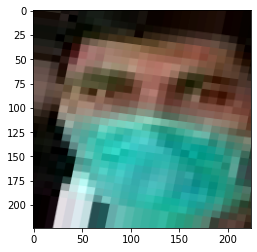

In [65]:
random_test_img = random.choice(glob.glob(test_dir+"/*/*"))
print(random_test_img)
img_test = cv2.imread(random_test_img)
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
plt.imshow(img_test)
plt.show()

In [66]:
img_test = preprocessing_img(img_test)
result = model.predict(img_test)
score = np.max(result)
predicted_class = classes[np.argmax(result)]
print(predicted_class)
print("Confident: ", score)

With Mask
Confident:  1.0
